In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\taewoo\Desktop\Datasets\Mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

As this data is for classification practices, it seems to be already cleaned by someone

In [5]:
# preprocessing data for classification models
df = df.apply(preprocessing.LabelEncoder().fit_transform)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
X = np.array(df.drop(columns='class'))
y = np.array(df['class'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

models = []
gaussian_model = GaussianNB()
svc_model = SVC(kernel='linear')
rfc_model = RandomForestClassifier(100)

models.append(gaussian_model)
models.append(svc_model)
models.append(rfc_model)

for model in models:
    model.fit(X_train, y_train)
    print(f"{model}'s training score '{model.score(X_train, y_train)}")
    y_predict = model.predict(X_test)
    print(f"{model}'s test score '{model.score(X_test, y_test)}")

GaussianNB()'s training score '0.9216249487074272
GaussianNB()'s test score '0.9188191881918819
SVC(kernel='linear')'s training score '0.9813978935850088
SVC(kernel='linear')'s test score '0.972939729397294
RandomForestClassifier()'s training score '1.0
RandomForestClassifier()'s test score '1.0


RFC's accuracy score is 100%, is that reasonable?

Given our training score and test score are both at 100%, it's neither underfitting or overfitting.

Does that mean I've built a perfect model? No, all I have done is creating a RFC model with 100 trees.

Random forest classifier creates decision trees for features and makes predictions with variances of each feature. It just happens to be perfect in this situation as the mushroom data is simple enough with a few variations, so 100% accuracy is not absured.

In [8]:
print('Is the RFC model really perfectly accurate?')
if all(y_test == y_predict):
    print('Yes!')
else:
    print('No')

Is the RFC model really perfectly accurate?
Yes!


### Visualization using PCA

Using PCA, I can shrink down features to 2

In [9]:
print(df.shape)

(8124, 23)


In [10]:
from sklearn.decomposition import PCA


pca = PCA(2)
projected = pca.fit_transform(X)
print(projected.shape)

(8124, 2)


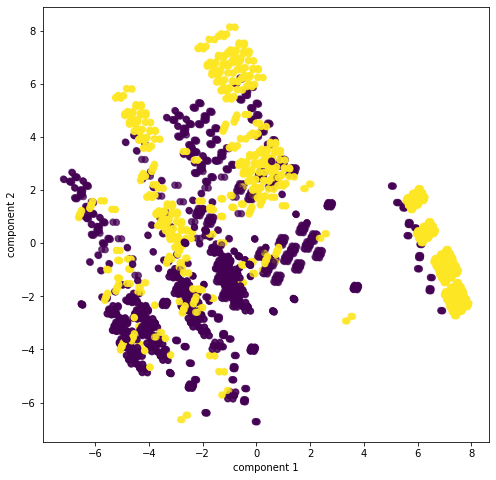

In [11]:
plt.figure(figsize=(8,8))
plt.scatter(projected[:, 0], projected[:, 1],
            c=df['class'], alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

It's hard to distinguish colors in a 2D graph

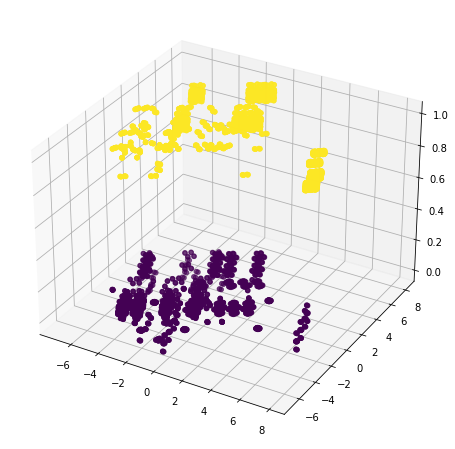

In [12]:
from mpl_toolkits import mplot3d


plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter3D(projected[:, 0], projected[:, 1], df['class'], c=df['class'])
plt.show()

Adding another dimension solved the problem

Types of mushrooms are distinguished by differences in y (we don't know what y represents as PCA was used)

As we see on the graph, they're perfectly differentiable 